# Tarea 5 Proyecto Análisis de Datos 

## Rony Mena Curvelo

Grupo: 202016908_92

Aprendizaje Supervisado   - Regresión Logística

In [5]:
# Cargue de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Paso 1 : Analisis Exploratorio

In [7]:
# Cargar el dataset
data = pd.read_csv("Titanic-Dataset.csv")

In [9]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
# Definición Dataset:

# IdPasajero: Un identificador único para cada pasajero.
# survival: Indica si el pasajero sobrevivió (1) o no (0).
# pclass: Clase del pasajero en el barco (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).
# nombre: Nombre completo del pasajero.
# sex: Género del pasajero (masculino o femenino).
# age: Edad del pasajero en años. Puede contener valores nulos si la edad no se conoce.
# sibsp: Número de hermanos o cónyuges del pasajero a bordo del Titanic.
# parch: Número de padres o hijos del pasajero a bordo del Titanic. 9 ticket: Número del billete del pasajero.
# fare: Tarifa pagada por el billete en libras esterlinas.
# cabin: Número de cabina del pasajero. Puede contener valores nulos si la cabina no se conoce.
# embarked: Puerto de embarque del pasajero (C = Cherburgo, Q = Queenstown, S = Southampton).

In [ ]:
# Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 

In [64]:
#Busqueda de datos con valores erroneos o Nulos
print("Cantidad de registros con valor 1 en Sobrevivio: ", data['Survived'].isin([1]).sum())
#print("Cantidad de registros con valor 0 No Sobrevivio: ", data['Survived'].isin([0]).sum())
print("Cantidad de registros con valor nulo en Nombre: ", data['Name'].isnull().sum())
print("Cantidad de registros con valor 0 en Clase: ", data['Pclass'].isin([0]).sum())
print("Cantidad de registros con valor nulo en Edad: ", data['Age'].isnull().sum())
print("Cantidad de registros con valor 0 en Tarifa: ", data['Fare'].isin([0]).sum())

Cantidad de registros con valor 1 en Sobrevivio:  342
Cantidad de registros con valor nulo en Nombre:  0
Cantidad de registros con valor 0 en Clase:  0
Cantidad de registros con valor nulo en Edad:  0
Cantidad de registros con valor 0 en Tarifa:  15


In [68]:
#Reemplazar los valores de Tarifa por el valor de la media
mean_age = data['Age'].mean()
data.fillna({'Age': mean_age}, inplace=True)



In [70]:
#Reemplazar los valores nulos de Edad  por el valor de la media
data['Fare']=data['Fare'].replace(0,data['Fare'].mean())

In [74]:
#Comprobacion aplicacion de cambios Tarifa
print("Cantidad de registros con valor 0 en Tarifa: ", data['Fare'].isin([0]).sum())

Cantidad de registros con valor 0 en Tarifa:  0


In [76]:
#Comprobacion aplicacion de cambios Edad
print("Cantidad de registros con valor nulo en Edad: ", data['Age'].isnull().sum())

Cantidad de registros con valor nulo en Edad:  0


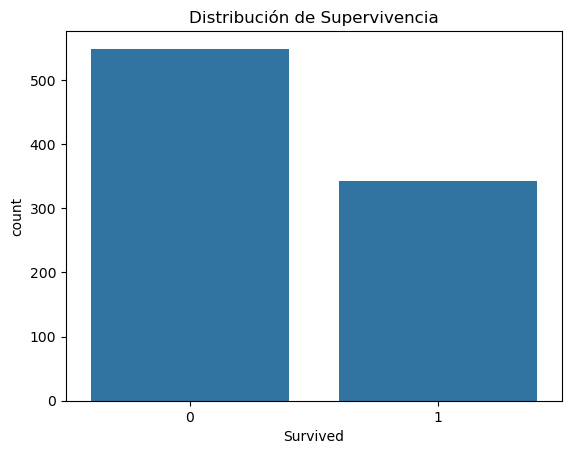

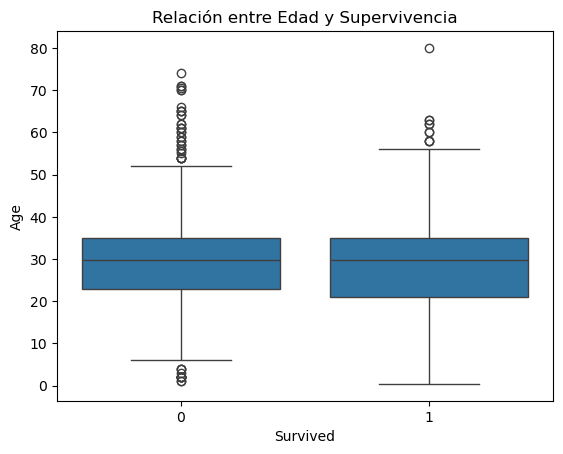

In [78]:
# Gráficos básicos
sns.countplot(x="Survived", data=data)
plt.title("Distribución de Supervivencia")
plt.show()

sns.boxplot(x="Survived", y="Age", data=data)
plt.title("Relación entre Edad y Supervivencia")
plt.show()

Text(0.5, 1.0, 'Grafica datos faltantes y atipicos')

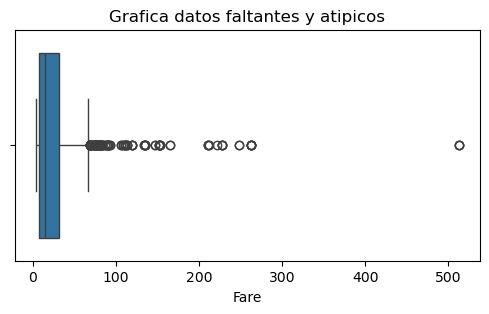

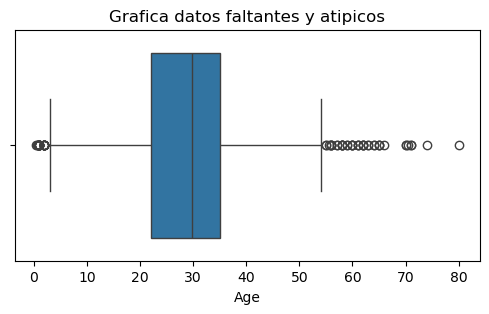

In [80]:
#Grafica de datos faltantes y atipicos en Clase
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Fare'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

#Grafica de datos faltantes y atipicos en Edad
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Grafica datos faltantes y atipicos', fontsize=12)

In [82]:
#Rango datos atipicos Tarifa
Nivel_minimo=1
Nivel_maximo=300
Total_atipicos_Tarifa=((data['Fare']<Nivel_minimo)|(data['Fare']>Nivel_maximo)).sum()
print("El total de datos atipicos en Tarifa es: {}".format(Total_atipicos_Tarifa))

#Rango datos atipicos Edad
Nivel_minimo=1
Nivel_maximo=90
Total_atipicos_Edad=((data['Age']<Nivel_minimo)|(data['Age']>Nivel_maximo)).sum()
print("El total de datos atipicos en Edad es: {}".format(Total_atipicos_Edad))

El total de datos atipicos en Tarifa es: 3
El total de datos atipicos en Edad es: 7


In [84]:
#Retirar datos atipicos Tarifa
data=data[(data['Fare']<Nivel_maximo)&(data['Fare']>Nivel_minimo)]

#Retirar datos atipicos Edad
data=data[(data['Age']<Nivel_maximo)&(data['Age']>Nivel_minimo)]

In [86]:
#Confirmacion eliminacion datos atipicos en Tarifa
Atipicos_Tarifa=((data['Fare']<Nivel_minimo)|(data['Fare']>Nivel_maximo)).sum()
print("El total de datos atipicos en Tarifa es: {}".format(Atipicos_Tarifa))

#Confirmacion eliminacion datos atipicos en Edad
Atipicos_Edad=((data['Age']<Nivel_minimo)|(data['Age']>Nivel_maximo)).sum()
print("El total de datos atipicos en Edad es: {}".format(Atipicos_Edad))

El total de datos atipicos en Tarifa es: 0
El total de datos atipicos en Edad es: 0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  817 non-null    int64  
 1   Survived     817 non-null    int64  
 2   Pclass       817 non-null    int64  
 3   Name         817 non-null    object 
 4   Sex          817 non-null    object 
 5   Age          817 non-null    float64
 6   SibSp        817 non-null    int64  
 7   Parch        817 non-null    int64  
 8   Ticket       817 non-null    object 
 9   Fare         817 non-null    float64
 10  Cabin        152 non-null    object 
 11  Embarked     815 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.0+ KB


# Paso 3 : Seleccion de características más relevantes para entrenar el modelo

In [97]:
#Sobrevivientes
print(data['Survived'].value_counts())

Survived
0    532
1    285
Name: count, dtype: int64


# Paso 4 : Dividicion de dataset en Train y Test

In [101]:
#Eliminacion columna Name, Sex, Ticket, Cabin y Embarked.
data = data.drop(columns=['Name'])
data = data.drop(columns=['Sex'])
data = data.drop(columns=['Ticket'])
data = data.drop(columns=['Cabin'])
data = data.drop(columns=['Embarked'])

In [103]:
#Creacion de variables X y Y para almacenar la informacion
X = data.drop('Survived',axis=1) 
Y = data['Survived'] 

In [109]:
#Asignacion de 80% Train y 20% Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)
print (X_train) #Datos sin columna Sobreviviente
print (Y_train) #Datos columna Sobreviviente

     PassengerId  Pclass        Age  SibSp  Parch     Fare
7              8       3   2.000000      3      1  21.0750
691          692       3   4.000000      0      1  13.4167
108          109       3  38.000000      0      0   7.8958
178          179       2  30.000000      0      0  13.0000
446          447       2  13.000000      0      1  19.5000
..           ...     ...        ...    ...    ...      ...
202          203       3  34.000000      0      0   6.4958
303          304       2  29.699118      0      0  12.3500
625          626       1  61.000000      0      0  32.3208
260          261       3  29.699118      0      0   7.7500
4              5       3  35.000000      0      0   8.0500

[653 rows x 6 columns]
7      0
691    1
108    0
178    0
446    1
      ..
202    0
303    1
625    0
260    0
4      0
Name: Survived, Length: 653, dtype: int64


# Paso 5 : Entrenar modelo configurando los diferentes hiperparámetros.

In [114]:
#Creacion modelo de regresion logistica
Modelo_regresion = LogisticRegression(solver = "liblinear")
Modelo_regresion.fit (X_train, Y_train)

#Declaracion variable de pronostico
Pronostico = Modelo_regresion.predict(X_test)

print (Y_test)

839    1
546    1
633    0
846    0
709    1
      ..
177    0
194    1
51     0
492    0
59     0
Name: Survived, Length: 164, dtype: int64


In [116]:
#Impresion del pronostico
print (Pronostico)

[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


# Paso 6 : Evaluar desempeño del modelo 

In [119]:
print (classification_report(Y_test, Pronostico))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       107
           1       0.60      0.37      0.46        57

    accuracy                           0.70       164
   macro avg       0.66      0.62      0.62       164
weighted avg       0.68      0.70      0.67       164



# Paso 7 : Graficas con los resultados del modelo

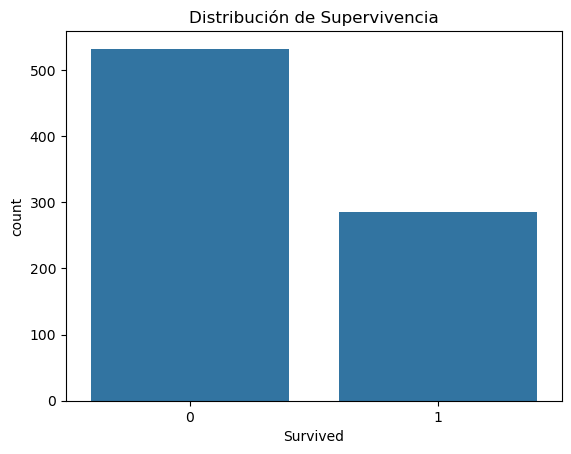

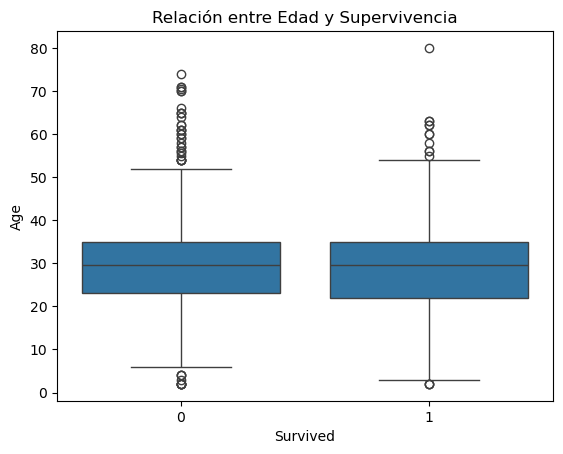

In [123]:
# Gráficos básicos
sns.countplot(x="Survived", data=data)
plt.title("Distribución de Supervivencia")
plt.show()

sns.boxplot(x="Survived", y="Age", data=data)
plt.title("Relación entre Edad y Supervivencia")
plt.show()

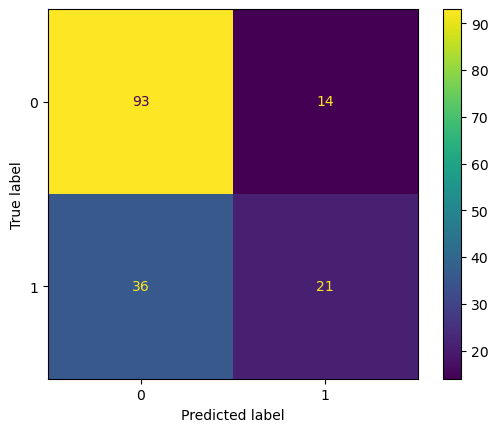

In [125]:
#Matrix de confusion

cm=confusion_matrix(Y_test,Pronostico)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

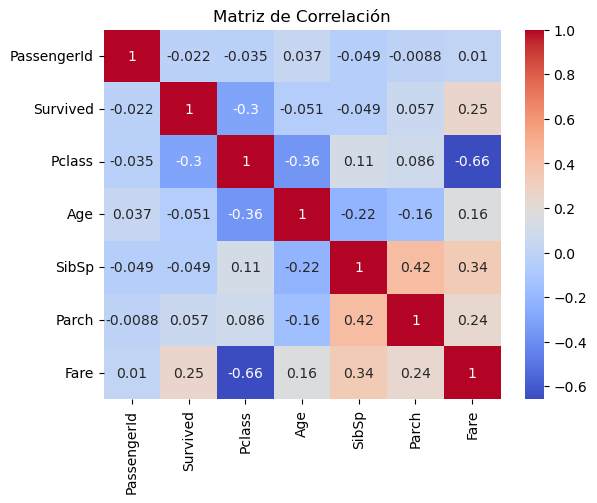

In [127]:
# Seleccionar solo columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar con seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

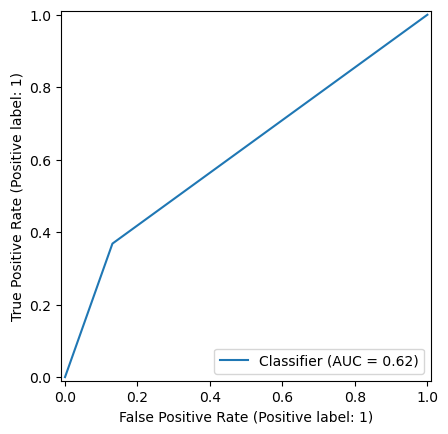

In [131]:
#Curva de prediccion

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Pronostico)
plt.show()

# Paso 8 : Interpretar, analizar y documentar los resultados obtenidos

Para interpretar, analizar y documentar los resultados obtenidos en el análisis de datos del Dataset Titanic, 
podemos seguir un enfoque estructurado que abarca desde la exploración inicial de los datos hasta 
la evaluación del  modelo de regresión logística. 

se presenta un analisis y descripcion de los pasos y hallazgos clave:

## 8.1 . Carga y Descripción del Conjunto de Datos

El conjunto de datos se carga utilizando pandas, y se realiza una descripción inicial con data.describe() y data.info(). Esto permite obtener información sobre las características de los pasajeros, incluyendo:

- IdPasajero: Identificador único.

- Survival: Variable objetivo (1 = sobrevivió, 0 = no sobrevivió).

- Pclass: Clase del pasajero (1, 2, 3).

- Nombre, Sexo, Edad: Información demográfica.

- SibSp, Parch: Número de familiares a bordo.

- Ticket, Fare, Cabin, Embarked: Información del billete y puerto de embarque.

## 8.2 . Análisis Exploratorio de Datos (EDA)

Se realizan varias visualizaciones para entender mejor la distribución de los datos:

- Distribución de Supervivencia: Se utiliza un gráfico de conteo (sns.countplot) para mostrar cuántos pasajeros sobrevivieron y cuántos no. Esto ayuda a identificar la proporción de sobrevivientes en el conjunto de datos.

- Relación entre Edad y Supervivencia: Un boxplot (sns.boxplot) muestra cómo varía la edad entre los sobrevivientes y no sobrevivientes, lo que puede indicar si la edad tiene un impacto en la supervivencia.

- Datos Faltantes y Atípicos: Se revisan los valores nulos en las columnas de Edad y Tarifa, así como la presencia de valores atípicos en estas variables, utilizando gráficos de caja.

## 8.3 . Preprocesamiento de Datos

Se eliminan columnas irrelevantes (como Nombre, Sexo, Ticket, Cabin y Embarked) para simplificar el modelo. Se crean las variables X (características) y Y (variable objetivo) para el entrenamiento del modelo.

## 8.4  División del Conjunto de Datos

El conjunto de datos se divide en un 80% para entrenamiento y un 20% para prueba utilizando train_test_split, asegurando que la distribución de la variable objetivo se mantenga.

## 8.5  Entrenamiento del Modelo

Se crea un modelo de regresión logística utilizando LogisticRegression y se entrena con los datos de entrenamiento. Se realiza la predicción sobre el conjunto de prueba.

## 8.6  Evaluación del Modelo

Se evalúa el desempeño del modelo utilizando métricas como la matriz de confusión y el informe de clasificación (classification_report). Esto proporciona información sobre la precisión, la recuperación y la puntuación F1 del modelo.

## 8.7 Visualización de Resultados

- Se visualizan los resultados del modelo mediante una matriz de confusión y se analiza la matriz de correlación para entender las relaciones entre las variables numéricas.

- Edad mediana- la línea dentro de cada cuadro representa la edad promedio de las personas en esa categoría de supervivencia. Si la edad media de los supervivientes (1) es inferior a la de los no supervivientes (0), puede sugerir que las personas más jóvenes tenían mayores posibilidades de sobrevivir

- Al ejecutar la formula de precision la cual es = TP / TP + FP =  93 / 93+36 = 72% ( Precision) 
    

## Conclusiones

- Impacto de la Edad y Clase: Los gráficos sugieren que la edad y la clase del pasajero son factores significativos en la supervivencia.

- Modelo de Regresión Logística: El modelo proporciona una buena base para predecir la supervivencia, aunque se pueden explorar otros modelos y técnicas de ajuste para mejorar la precisión.

- Datos Faltantes: La gestión de datos faltantes es crucial y puede influir en el rendimiento del modelo.

- Este análisis proporciona una comprensión integral de los factores que influyen en la supervivencia de los pasajeros del Titanic y establece una base para futuras investigaciones y mejoras en el modelo.